# insurance-prediction Notebook


This notebook covers:
- Loading the data
- Simple EDA and feature enginnering


### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.metrics import accuracy_score, classification_report,plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

#preprocessing module
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split ,StratifiedKFold,GridSearchCV
from imblearn.combine import SMOTEENN


##feature Scaling
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

###  Load the dataset

In [2]:
# Load files into a pandas dataframe
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

###  Data Assessing

In [3]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (7160, 14)
test data shape : (3069, 13)


In [4]:
# inspect train data
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [5]:
# inspect test data
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [6]:
# inspect data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


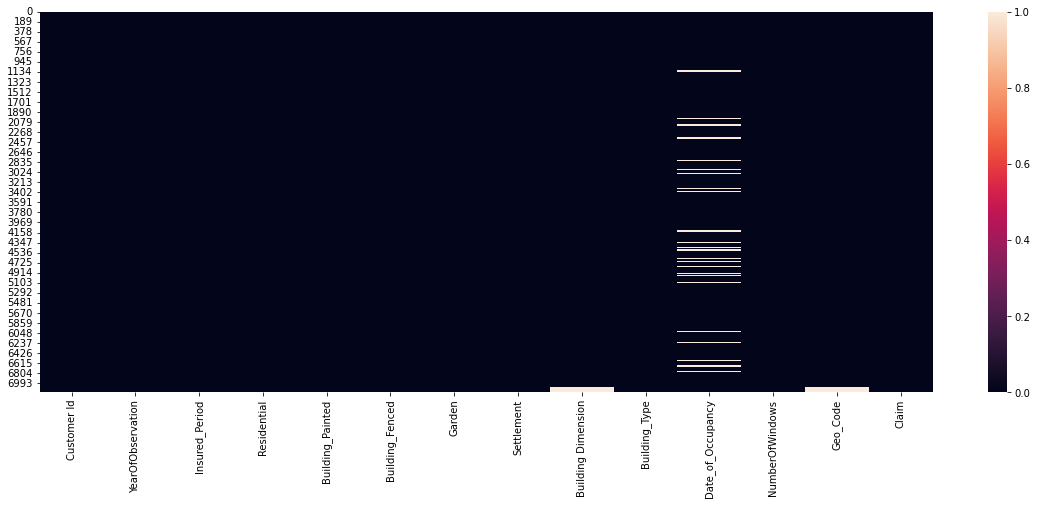

In [7]:
#check missing values in train data
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(train.isnull(), vmin=0, vmax = 1)

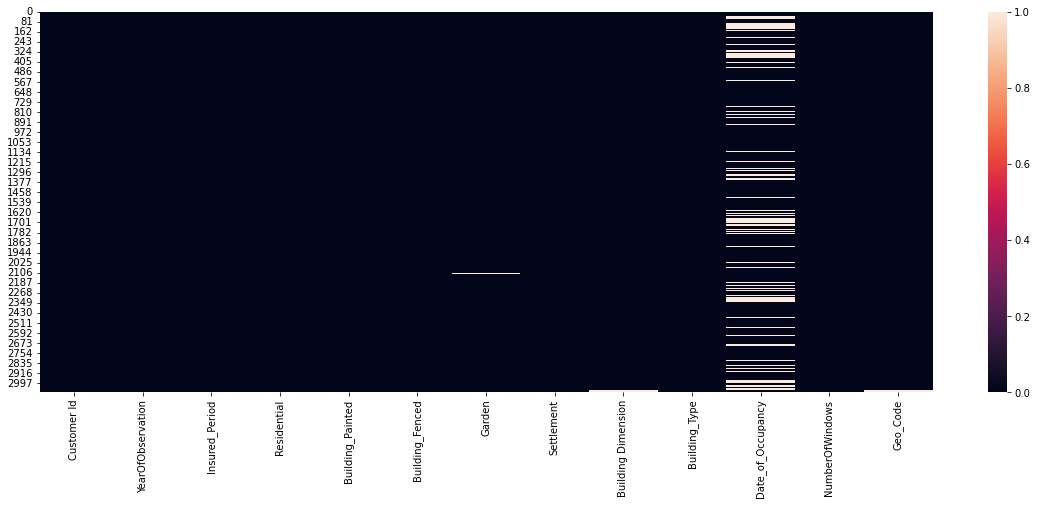

In [8]:
#check missing values in test data
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(test.isnull(), vmin=0, vmax = 1)

- there seems to be missing data in both train ad test dataset

##  Data Cleaning

In [9]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [10]:
# filling missing values with thier mean value

train['Building Dimension'] = train['Building Dimension'].fillna(train['Building Dimension'].mean())
test['Building Dimension'] = test['Building Dimension'].fillna(test['Building Dimension'].mean())

In [11]:
# filling missing values with thier median values

train['Date_of_Occupancy'] = train['Date_of_Occupancy'].fillna(train['Date_of_Occupancy'].median())
test['Date_of_Occupancy'] = test['Date_of_Occupancy'].fillna(train['Date_of_Occupancy'].median())

In [12]:
# filling missing values 

train['Geo_Code'] = train['Geo_Code'].fillna(value=-1)
test['Geo_Code'] = test['Geo_Code'].fillna(value=-1)

In [13]:
train['Geo_Code'] = train['Geo_Code'].map(train['Geo_Code'].value_counts().to_dict())
test['Geo_Code'] = test['Geo_Code'].map(test['Geo_Code'].value_counts().to_dict())

In [14]:
# filling missing values 

train['Garden'] = train['Garden'].fillna(value=-1)
test['Garden'] = test['Garden'].fillna(value=-1)

In [15]:
train.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [16]:
test.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [17]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (7160, 14)
test data shape : (3069, 13)


##  Feature Engineering 

In [18]:
#check for no of unique columns

for name in train.columns:
    unique_values = train[name].nunique()
    print(f"Feature '{name}' has '{unique_values}' unique values")

Feature 'Customer Id' has '7160' unique values
Feature 'YearOfObservation' has '5' unique values
Feature 'Insured_Period' has '401' unique values
Feature 'Residential' has '2' unique values
Feature 'Building_Painted' has '2' unique values
Feature 'Building_Fenced' has '2' unique values
Feature 'Garden' has '3' unique values
Feature 'Settlement' has '2' unique values
Feature 'Building Dimension' has '2044' unique values
Feature 'Building_Type' has '4' unique values
Feature 'Date_of_Occupancy' has '134' unique values
Feature 'NumberOfWindows' has '11' unique values
Feature 'Geo_Code' has '57' unique values
Feature 'Claim' has '2' unique values


In [19]:
#Encoding categorical training Data

train['Building_Fenced'] = train['Building_Fenced'].replace({'N':1, 'V':0})
train['Building_Painted'] = train['Building_Painted'].replace({'N':1, 'V':0})
train['Garden'] = train['Garden'].replace({'V':1, 'O':0})
train['Settlement'] = train['Settlement'].replace({'U':1, 'R':0})

In [20]:
#Encoding categorical test Data

test['Building_Fenced'] = test['Building_Fenced'].replace({'N':1, 'V':0})
test['Building_Painted'] = test['Building_Painted'].replace({'N':1, 'V':0})
test['Garden'] = test['Garden'].replace({'V':1, 'O':0})
test['Settlement'] = test['Settlement'].replace({'U':1, 'R':0})

In [21]:
#converting the insurance period to number of weeks

train['Insured_Period'] = train['Insured_Period'].apply(lambda x: x*52)
test['Insured_Period'] = test['Insured_Period'].apply(lambda x: x*52)

In [22]:
train['Insured_Period'] = train['Insured_Period'].round(0)
test['Insured_Period'] = test['Insured_Period'].round(0)

## Exploratory Data Analysis

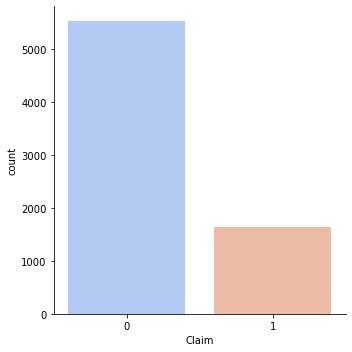

In [23]:
# Explore Target distribution 
sns.catplot(x="Claim", kind="count", data=train,palette='coolwarm')

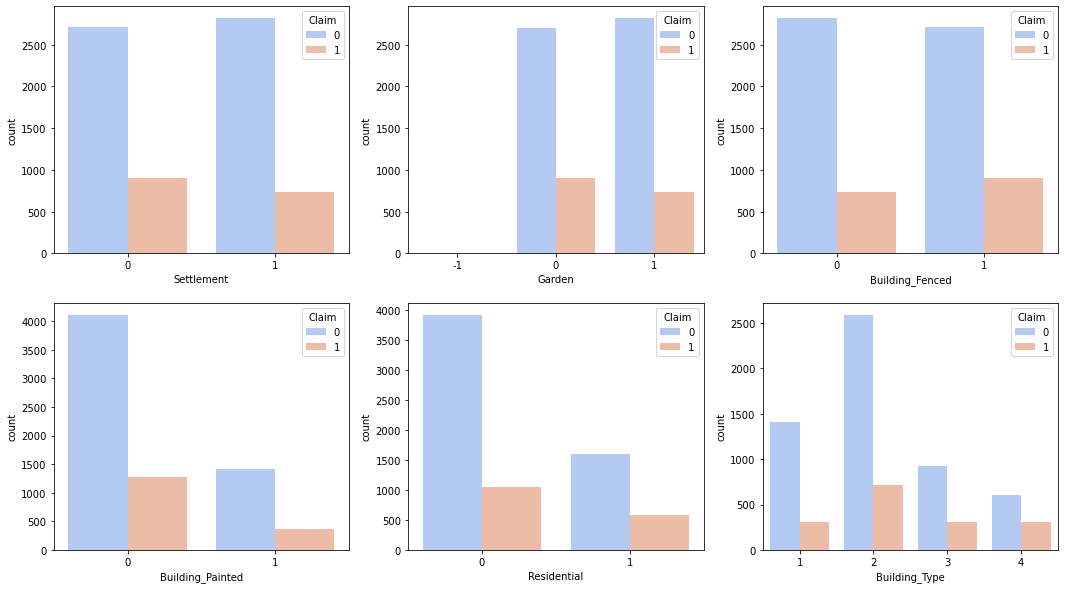

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.countplot(ax=axes[0, 0], data=train, x='Settlement',hue='Claim',palette='coolwarm')
sns.countplot(ax=axes[0, 1], data=train, x='Garden',hue='Claim',palette='coolwarm')
sns.countplot(ax=axes[0, 2], data=train, x='Building_Fenced',hue='Claim',palette='coolwarm')
sns.countplot(ax=axes[1, 0], data=train, x='Building_Painted',hue='Claim',palette='coolwarm')
sns.countplot(ax=axes[1,1],data = train, x ='Residential' ,hue='Claim',palette='coolwarm')
sns.countplot(ax=axes[1,2],data = train, x ='Building_Type',hue='Claim',palette='coolwarm' )
plt.show()

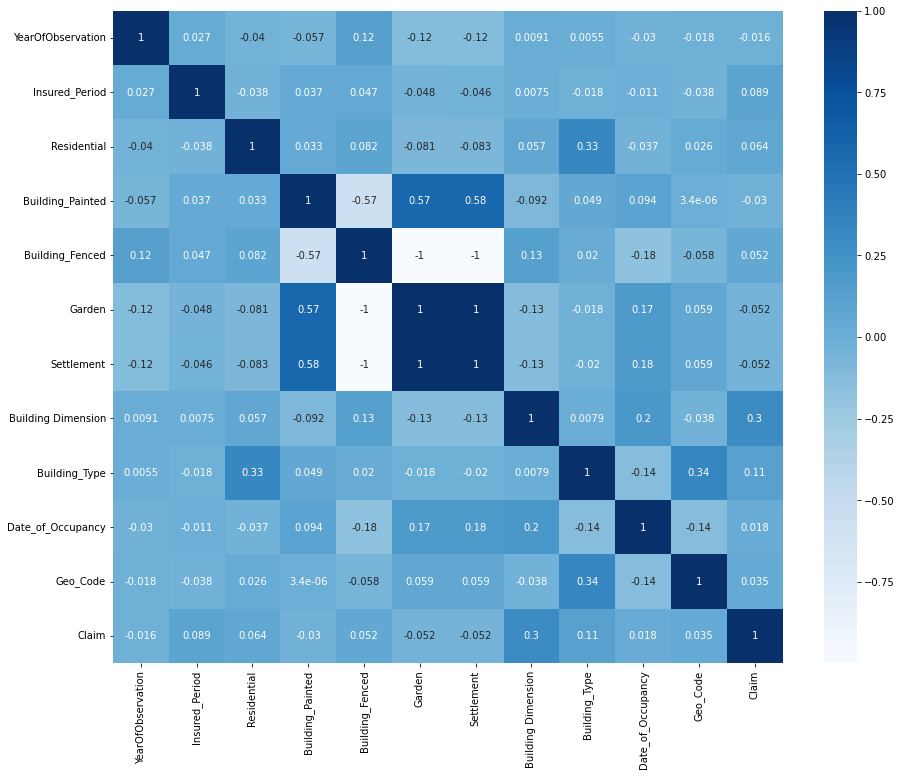

In [25]:
#checking for correlation

plt.figure(figsize=(15,12))
sns.heatmap(train.corr(),annot=True,cbar=True, cmap='Blues')
plt.show()

In [26]:
train.to_csv('cleaned_train.csv', index=False)
test.to_csv('cleaned_test.csv', index=False)